In [42]:
from skimage import io, img_as_float
from skimage.color import rgb2gray, rgba2rgb
import numpy as np

ImportError: cannot import name 'rgba2gray' from 'skimage.color' (c:\Users\asusr\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\color\__init__.py)

In [33]:
BASE = "./Hand"
path_ao = "_Ao.tga"
path_metallic = "_Metallic.tga"

In [48]:
def convert2gray(img):
    if img.ndim <= 2:
        return img_as_float( img )
    elif img.shape[2] == 1:
        return img_as_float( np.squeeze(img, axis=-1) )
    elif img.shape[2] == 2:
        return img_as_float( img[:,:,1] )
    elif img.shape[2] == 3:
        return img_as_float( rgb2gray( img ) )
    elif img.shape[2] == 4:
        return img_as_float( rgb2gray( img[:,:,:3] ) )

In [64]:
ao = convert2gray (io.imread(BASE+path_ao) ) 
metallic = convert2gray( io.imread(BASE+path_metallic) ) 
n,m = ao.shape
r = np.ones((n,m))


(2048, 2048, 3)


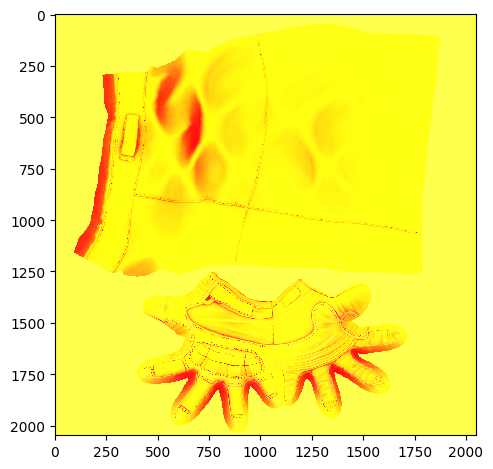

In [65]:
#r_ao_m
# roughness = 0
stacked = np.stack((r, ao, metallic), axis=2)
stacked = img_as_float(stacked)
print(stacked.shape)
io.imshow(stacked)

In [66]:
image_uint8 = (stacked * 255).astype(np.uint8)

io.imsave(BASE+"r_ao_m.png", image_uint8)